<a href="https://colab.research.google.com/github/JoseWalterLima/hello-world/blob/master/Schools_Return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando bibliotecas**

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Definindo Estrutura da Vizualização**

In [28]:
def plotseird(t, S, E, I, R, D):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Sucetíveis')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Expostos')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infectados')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recuperados')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Mortos')
    
  ax.set_xlabel('Dias')
  ax.set_ylabel('Número de Pessoas')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend(borderpad=2.0)
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  
plt.show();

**Função para Cálculo das Variáveis**

In [100]:
def deriv(y, t, N, beta, gamma, delta, alpha, p):
    S, E, I, R, D = y
    dSdt = -beta * I * (S / N) # Quantidade de Suscetíveis, t
    dEdt = beta * I * (S / N) - (delta * E) # Quantidade de Expostos, t
    dIdt = delta * E - (1 - alpha) * gamma * I - (alpha * p * I) # Quantidade de Infectados, t
    dRdt = (1 - alpha) * gamma * I # Quantidade de Recuperados, t
    dDdt = alpha * p * I # Quantidade de Mortos, t
    return dSdt, dEdt, dIdt, dRdt, dDdt

**Definição das Variáveis**

In [132]:
N = 1000000 # População total
D = 5.0 # A infecção dura por 4 dias 
gamma = 1.0 / D # Proporção de infectados que se recuparem diráriamente
delta = 1.0 / 5.0  # Período de incubação de 5 dias
R_0 = 5.0 # Quantidade total de pessoas que um infectado irá infectar
beta = R_0 / D  # Quantidade diária de pessoas que um infectado irá infectar 
alpha = 0.2  # Taxa de mortalidade de 20% 
p = 1/9  # Período entre a infecção e morte (9 dias para um doente falecer)
S0, E0, I0, R0, D0 = N-2000, 1000, 1000, 0, 0  # Cenário inicial (1 infectado)

**Integrando no Tempo**

In [133]:
t = np.linspace(0, 100, 100) # Quantidade de pontos de medução (dias)
y0 = S0, E0, I0, R0, D0 # Vetor do Cenário Inicial

# Integrando a equação SEIRD ao longo do tempo, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, p))
S, E, I, R, D = ret.T

**Plotando Simulação**

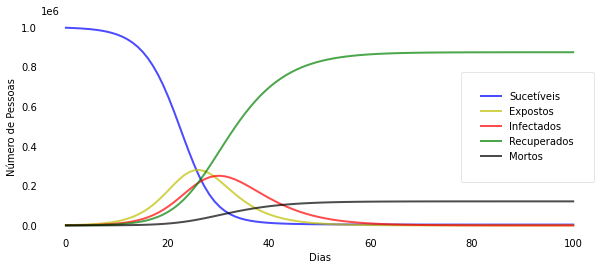

In [138]:
plotseird(t, S, E, I, R, D)